## Imports

In [77]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

## Read text

In [78]:
path = 'raw_data/screenplay_data/data/raw_texts/raw_texts/Scooby Doo_0267913.txt'
txt = open(path,'r').read()
txt = txt.replace('\n', ' ')
txt

'   Tea    \x0cSCOOBY -DOO  by Craig Titley  based on characters created by Hanna-Barbera  previous revision by Jay Kogen  new draft by James Gunn  FIRST DRAFT March 17, 2000 WARNER BROS. © 2000 4000 Warner Boulevard WARNER BROS.  Burbank, California 91522 All Rights Reserved \x0cFADE IN:  EXT. SPOOKY ISLAND - NIGHT  A full moon pokes a white hole in a black sky. 0.S. we hear FESTIVE ROCK ‘N ROLL and the WHOOPS and HOLLERS of JOYFUL REVELERS.  We PAN DOWN TO Spooky Island, a tropical island/theme park. This cheesy tourist trap is hardly a Disneyland or Magic Mountain, nor even, sad to say, a Legoland. Like Rome, it was not built in a day. Unlike Rome, it very well likely could have been.  We PASS a colorful Fiberglass “haunted" castle that sits atop a small mountain. We PASS palm trees and huge papier mache heads impaled on stakes. We APPROACH a lit sign that reads: °  WELCO E TO SP ORY ISLAND WHERE FEAR IS Y UR ONLY FRIEND  We MOVE PAST the sign and OUT OVER a crowd of college student

## Cut text

In [79]:
l = len(txt)
n = 20
ran = np.arange(0,l,n)
ran

array([     0,     20,     40, ..., 127500, 127520, 127540])

In [80]:
parts = []

for r in ran:
        parts.append(txt[r:r+n])

len(parts)

6378

In [81]:
data = pd.DataFrame(parts, columns=['script'])

In [82]:
data.head()

,script
0,Tea SCOOBY -D
1,OO by Craig Titley
2,based on characters
3,created by Hanna-Ba
4,rbera previous revi


## Model

In [83]:
analyzer = SentimentIntensityAnalyzer()
data['result'] = data.script.apply(lambda x: analyzer.polarity_scores(x))
data['neg'] = data.script.apply(lambda x: analyzer.polarity_scores(x)['neg'])
data['neu'] = data.script.apply(lambda x: analyzer.polarity_scores(x)['neu'])
data['pos'] = data.script.apply(lambda x: analyzer.polarity_scores(x)['pos'])
data['compound'] = data.script.apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [84]:
data.iloc[25:35]

,script,result,neg,neu,pos,compound
25,This cheesy tourist,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
26,trap is hardly a Di,"{'neg': 0.365, 'neu': 0.635, 'pos': 0.0, 'comp...",0.365,0.635,0.000,-0.3182
27,sneyland or Magic Mo,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
28,"untain, nor even, sa","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
29,"d to say, a Legoland","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
30,". Like Rome, it was","{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.000,0.615,0.385,0.3612
31,not built in a day.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
32,"Unlike Rome, it very","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
33,well likely could h,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.000,0.588,0.412,0.2732
34,ave been. We PASS a,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


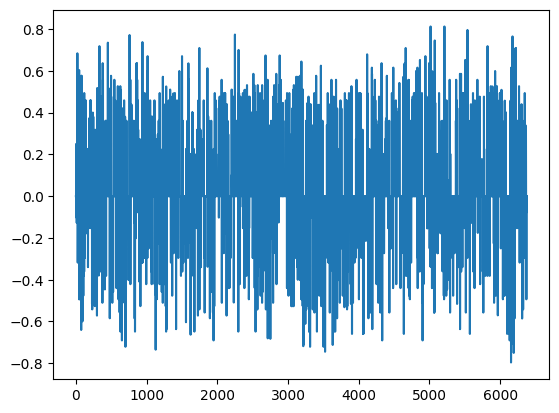

In [85]:
# plt.plot(data.index, data.neg)
# plt.plot(data.index, data.pos)
# plt.plot(data.index, data.neu)
plt.plot(data.index, data.compound)
plt.show()